# **Project 2**, APS1070 Summer 2022

## **Anomaly Detection Algorithm using Gaussian Mixture Model**


##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **[0.1]**

 **284807 rows.**
* What features in the dataset are present aside from the 28 main features? **[0.1]**

 **Apart from V1 to V28, the features present are: Time and Amount.**   
* Which column contains the targets? **[0.1]**

 **Class Column.**
* What is the meaning of target values? **[0.1]**

 **If Class==0, the transaction is a Valid transaction**

 **If Class==1, the transaction is a Fraud transaction**

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class?  **[0.1]**
 
 **Percent of Fraud entries (Class==1) is: 0.173%**

 **Percent of Valid entries (Class==0) is: 99.827%**

* Is this data considered balanced or unbalanced? Why is this the case? **[0.1]**

 **The Data is considered unbalanced, as the number of fraud entries (Class==1) is significantly lower than the number of non-fraud/valid (Class==0) entries. This is because in the real world, a fraud transaction is not a common event, and hence the number of fraud transactions are far lesser than the number of valid transaction.**  

* Why is balance/imbalance important? How might this class distribution affect a KNN classifier for example, which we explored in Project 1? **[0.5]**

 **The imbalance in the dataset is very important because in the real world, a fraud transaction is not a common event, and hence the number of fraud transactions are far lesser than the number of valid transaction. It is because of this imbalance that we cannot use accuracy as our metric for evaluating our model.**

 **A KNN classifier that uses the nearest neighbours to predict the label of a data point would likely predict the class of every example as valid, as the dataset is highly biased in favour of valid samples. This will lead to a very high number of false negatives (ie. fraud transaction predicted as valid.**

* What metrics should we use to evaluate a model in such cases? **[0.2]**

 **We can use metrics like F1 score and Area Under Curve (AUC) of the precision-recall curve to evaluate our model in such cases.**

 **We cannot use accuracy as our metric because the data is unbalanced, so even if the algorithm classifies every entry as valid, the accuracy would be 99.827% which is very high. However this model would be useless for detecting fraud transactions.**

In [ ]:
### YOUR CODE HERE ###

fraud = 0
for i in range(df.shape[0]):
    fraud = fraud + df['Class'][i]

not_fraud = df.shape[0] - fraud

In [ ]:
print("Precent of Fraud entries = %f%%"%(fraud/df.shape[0]*100))

Precent of Fraud entries = 0.172749%


In [ ]:
print("Precent of Valid entries = %f%%"%(100 - fraud/df.shape[0]*100))

Precent of Valid entries = 99.827251%


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###

y = df['Class']
X = df.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(20.0/85.0), random_state=40) #20% of original = (20/85)*100% of 85% remaining

print("Train Data shape: ", X_train.shape, y_train.shape)
print("Validation Data shape: ", X_val.shape, y_val.shape)
print("Test Data shape: ", X_test.shape, y_test.shape)

Train Data shape:  (185123, 30) (185123,)
Validation Data shape:  (56962, 30) (56962,)
Test Data shape:  (42722, 30) (42722,)


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

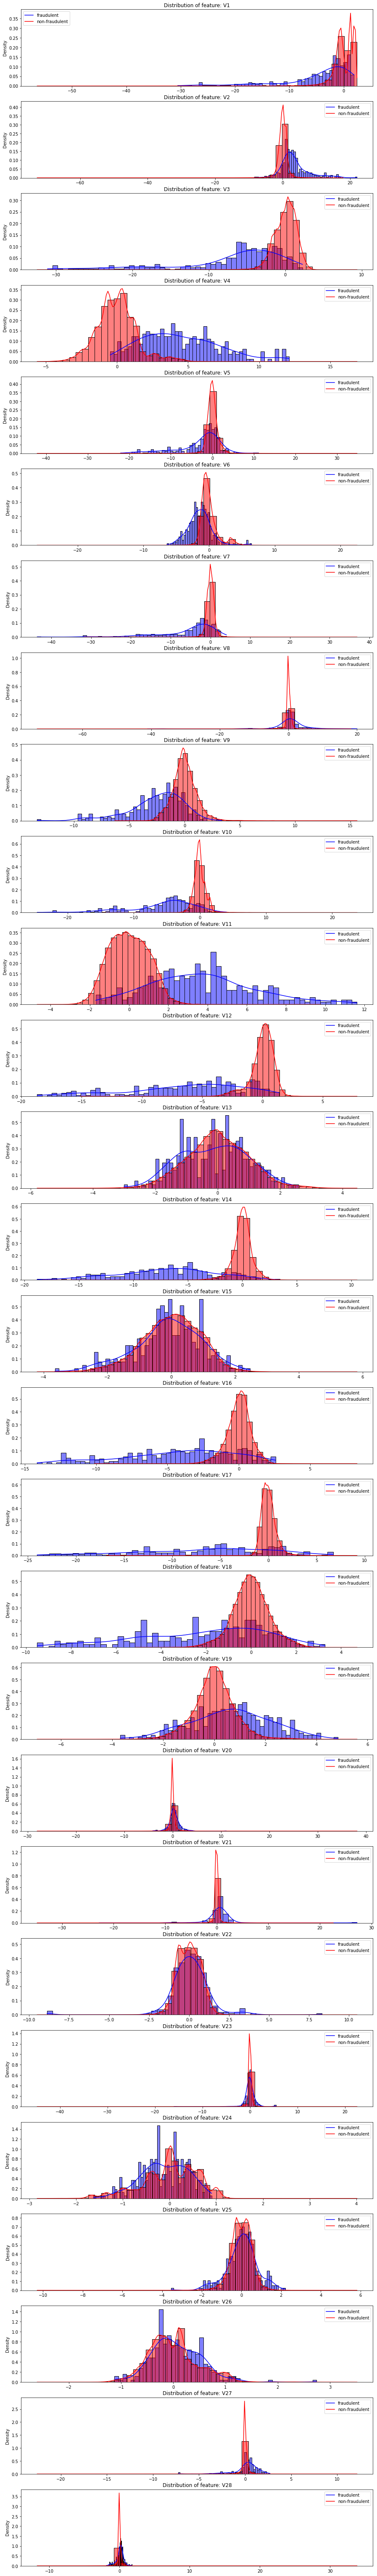

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

 **These graph shows features that obey different gaussians (different mean and variance) for Valid and Fraud transactions (V4, V10, V11, V12, V14, V17 etc). These features are very useful to separate the Fraud and Valid transactions into two Gaussians. If we use two Gaussians with different variances for different features (mixture of two multivariate Gaussians), we could separate the fraud and valid transactions into two multivariate gaussians which would make it very easy to detect fraud transactions.**

 **On the other hand, there are some features like V22 and V25 that are not very clearly separable into different Gaussians. These features will not be of much help in separating fraud and valid transactions.**

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way! Hint: See Tutorial 2's methods of coming up with thresholds) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why? **[0.5]**


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score #Can be used directly instead of first roc_curve then auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Part 2. a.

In [ ]:
### YOUR CODE HERE ###

features=[f for f in df.columns if 'V' in f]

auc_train_score_features = []
auc_val_score_features = []

for feature in features:
    gmm = GaussianMixture(n_components=1, random_state=0)

    X_train_feature = X_train[feature].values.reshape(-1,1)
    X_val_feature = X_val[feature].values.reshape(-1,1)

    gmm.fit(X_train_feature)

    train_score = gmm.score_samples(X_train_feature)
    val_score = gmm.score_samples(X_val_feature)
    
    auc_train_score_features.append(roc_auc_score(y_train, -1 * train_score))
    auc_val_score_features.append(roc_auc_score(y_val, -1 * val_score))


best_3_features = np.argsort(np.array(auc_val_score_features))[-3:]

print("Table for AUC on Training Set for each Feature")
for i in range(len(features)):
    print(features[i], auc_train_score_features[i])

print()

print("Table for AUC on Validation Set for each Feature")
for i in range(len(features)):
    print(features[i], auc_val_score_features[i])

print()

print("Best 3 features are: ", features[best_3_features[2]],",",features[best_3_features[1]], ",",features[best_3_features[0]])
print("AUC (on Validation set) for these features are: ", auc_val_score_features[best_3_features[2]],",",auc_val_score_features[best_3_features[1]], ",",auc_val_score_features[best_3_features[0]])

Table for AUC on Training Set for each Feature
V1 0.692540433202598
V2 0.8482452385159246
V3 0.8700041652997159
V4 0.8897153631196573
V5 0.7611533352932502
V6 0.7279971059014934
V7 0.8654974037710063
V8 0.7749031264484904
V9 0.7992785827266067
V10 0.9100251904339873
V11 0.8991313167116375
V12 0.9119076249251292
V13 0.5625309023864885
V14 0.9480139640555438
V15 0.519664160484733
V16 0.8963836742164923
V17 0.9289365350897345
V18 0.8054702521876731
V19 0.7474521779529775
V20 0.7232344538750277
V21 0.8129684806833175
V22 0.54718142170791
V23 0.6870881859455938
V24 0.48147293642471417
V25 0.5720532991657536
V26 0.49983369722428633
V27 0.8177126303496314
V28 0.8029871884011812

Table for AUC on Validation Set for each Feature
V1 0.7161175022242452
V2 0.8524559806335479
V3 0.8567589469836475
V4 0.8832795376328513
V5 0.7811597801273165
V6 0.7214129302793928
V7 0.8871633458166946
V8 0.7903169463353403
V9 0.794322656955853
V10 0.9172792824481181
V11 0.8800862800273116
V12 0.8928615519369901
V13 

In [ ]:
optimal_threshold = []
f1_at_optimal_threshold = []


for i in best_3_features:

    gmm = GaussianMixture(n_components=1, random_state=0)
    X_train_feature = X_train[features[i]].values.reshape(-1,1)
    X_val_feature = X_val[features[i]].values.reshape(-1,1)

    gmm.fit(X_train_feature)

    val_score = gmm.score_samples(X_val_feature)

    sorted_val_score = sorted(val_score)  #sort points by probability first

    max_f1 = 0
    best_threshold = 0
    tr=0

    #I narrowed down the search space to the first 300 points by first taking the first 5000 points in increments of 10 and calculating f1 score
    for j in range(0, 300):
        tr = sorted_val_score[j]
        f1 = f1_score(y_val, val_score < tr)
        if (f1>max_f1):
            max_f1=f1
            best_threshold=tr
    
    optimal_threshold.append(best_threshold)
    f1_at_optimal_threshold.append(max_f1)

for i in range(3):
    print("Feature:",features[best_3_features[i]],"Threshold =",optimal_threshold[i],"Maximum F1 Score=",f1_at_optimal_threshold[i])

Feature: V10 Threshold = -27.746451540965463 Maximum F1 Score= 0.21296296296296297
Feature: V17 Threshold = -22.026415372538736 Maximum F1 Score= 0.5977011494252873
Feature: V14 Threshold = -19.241684335652995 Maximum F1 Score= 0.6192893401015229


In [ ]:
table_train = []
table_val = []

for i in range(3):

    gmm = GaussianMixture(n_components=1, random_state=0)
    
    X_train_feature = X_train[features[best_3_features[i]]].values.reshape(-1,1)
    X_val_feature = X_val[features[best_3_features[i]]].values.reshape(-1,1)

    gmm.fit(X_train_feature)

    train_score = gmm.score_samples(X_train_feature)
    val_score = gmm.score_samples(X_val_feature)

    precision = precision_score(y_train, train_score < optimal_threshold[i]) 
    recall = recall_score(y_train, train_score < optimal_threshold[i])
    f1 = f1_score(y_train, train_score < optimal_threshold[i])

    table_train.append([precision, recall, f1])

    precision = precision_score(y_val, val_score < optimal_threshold[i]) 
    recall = recall_score(y_val, val_score < optimal_threshold[i])
    f1 = f1_score(y_val, val_score < optimal_threshold[i])

    table_val.append([precision, recall, f1])

table_train = np.array(table_train)
table_val = np.array(table_val)

table_indices = [features[best_3_features[0]], features[best_3_features[1]], features[best_3_features[2]]]

table_train = pd.DataFrame(table_train, columns=["Training Precision","Training Recall","Training F1 Score"], index=table_indices)
table_val = pd.DataFrame(table_val, columns=["Validation Precision","Validation Recall","Validation F1 Score"], index=table_indices)

In [ ]:
print("Train Precision, Recall and F1 Score")
table_train

Train Precision, Recall and F1 Score


,Training Precision,Training Recall,Training F1 Score
V10,0.184466,0.236025,0.207084
V17,0.653061,0.496894,0.564374
V14,0.622896,0.574534,0.597738


In [ ]:
print("Validation Precision, Recall and F1 Score")
table_val

Validation Precision, Recall and F1 Score


,Validation Precision,Validation Recall,Validation F1 Score
V10,0.201754,0.225490,0.212963
V17,0.722222,0.509804,0.597701
V14,0.642105,0.598039,0.619289


In [ ]:
table_train_2a = table_train
table_val_2a = table_val

* **Complexity of method to determine optimal threshold: O(1), ie. constant complexity. This is because only a constant number of points are selected and iterated over to find the threshold (here, I used 300 points)**

### Part 2. b.

In [ ]:
optimal_threshold = []
f1_at_optimal_threshold = []

X_train_valid = X_train[y_train==0] #masking y_train to only valid (class==0)

for i in best_3_features:

    gmm = GaussianMixture(n_components=1, random_state=0)

    X_train_feature_valid = X_train_valid[features[i]].values.reshape(-1,1)

    gmm.fit(X_train_feature_valid)

    X_val_feature = X_val[features[i]].values.reshape(-1,1)
    val_score = gmm.score_samples(X_val_feature)

    sorted_val_score = sorted(val_score)  #sort points by probability first

    max_f1 = 0
    best_threshold = 0
    tr=0

    for j in range(0, 300):
        tr = sorted_val_score[j]
        f1 = f1_score(y_val, val_score < tr)
        if (f1>max_f1):
            max_f1=f1
            best_threshold=tr
    
    optimal_threshold.append(best_threshold)
    f1_at_optimal_threshold.append(max_f1)

for i in range(3):
    print("Feature:",features[best_3_features[i]],"Threshold =",optimal_threshold[i],"Maximum F1 Score=",f1_at_optimal_threshold[i])


Feature: V10 Threshold = -29.99196132680162 Maximum F1 Score= 0.21296296296296297
Feature: V17 Threshold = -27.540109956229216 Maximum F1 Score= 0.5977011494252873
Feature: V14 Threshold = -21.847508192747352 Maximum F1 Score= 0.6192893401015229


In [ ]:
table_train = []
table_val = []

for i in range(3):
    X_train_feature = X_train[features[best_3_features[i]]].values.reshape(-1,1)
    X_val_feature = X_val[features[best_3_features[i]]].values.reshape(-1,1)

    X_train_feature_valid = X_train_valid[features[best_3_features[i]]].values.reshape(-1,1)

    gmm = GaussianMixture(n_components=1, random_state=0)
    gmm.fit(X_train_feature_valid)

    train_score = gmm.score_samples(X_train_feature)
    val_score = gmm.score_samples(X_val_feature)

    precision = precision_score(y_train, train_score < optimal_threshold[i]) 
    recall = recall_score(y_train, train_score < optimal_threshold[i])
    f1 = f1_score(y_train, train_score < optimal_threshold[i])

    table_train.append([precision, recall, f1])

    precision = precision_score(y_val, val_score < optimal_threshold[i]) 
    recall = recall_score(y_val, val_score < optimal_threshold[i])
    f1 = f1_score(y_val, val_score < optimal_threshold[i])

    table_val.append([precision, recall, f1])

table_train = np.array(table_train)
table_val = np.array(table_val)

table_indices = [features[best_3_features[0]], features[best_3_features[1]], features[best_3_features[2]]]

table_train = pd.DataFrame(table_train, columns=["Training Precision","Training Recall","Training F1 Score"], index=table_indices)
table_val = pd.DataFrame(table_val, columns=["Validation Precision","Validation Recall","Validation F1 Score"], index=table_indices)

In [ ]:
print("Train Precision, Recall and F1 Score")
table_train

Train Precision, Recall and F1 Score


,Training Precision,Training Recall,Training F1 Score
V10,0.184466,0.236025,0.207084
V17,0.653061,0.496894,0.564374
V14,0.622896,0.574534,0.597738


In [ ]:
print("Validation Precision, Recall and F1 Score")
table_val

Validation Precision, Recall and F1 Score


,Validation Precision,Validation Recall,Validation F1 Score
V10,0.201754,0.225490,0.212963
V17,0.722222,0.509804,0.597701
V14,0.642105,0.598039,0.619289


In [ ]:
table_train_2b = table_train
table_val_2b = table_val

In [ ]:
table_train = [table_train_2a, table_train_2b]
table_val = [table_val_2a, table_val_2b]

In [ ]:
table_train = pd.concat(table_train, axis=0)
table_val = pd.concat(table_val, axis=0)

In [ ]:
table = [table_train,table_val]
table = pd.concat(table, axis=0)

In [ ]:
table

,Training Precision,Training Recall,Training F1 Score,Validation Precision,Validation Recall,Validation F1 Score
V10,0.184466,0.236025,0.207084,NaN,NaN,NaN
V17,0.653061,0.496894,0.564374,NaN,NaN,NaN
V14,0.622896,0.574534,0.597738,NaN,NaN,NaN
V10,0.184466,0.236025,0.207084,NaN,NaN,NaN
V17,0.653061,0.496894,0.564374,NaN,NaN,NaN
V14,0.622896,0.574534,0.597738,NaN,NaN,NaN
V10,NaN,NaN,NaN,0.201754,0.225490,0.212963
V17,NaN,NaN,NaN,0.722222,0.509804,0.597701
V14,NaN,NaN,NaN,0.642105,0.598039,0.619289
V10,NaN,NaN,NaN,0.201754,0.225490,0.212963


Are these results different or similar? Why? **[0.5]**

 **These results are similar. This is because the number of fraudulent samples is so small comparable to the number of valid samples, that the Gaussian Model is not affected much by the presence or absence of these samples from the training dataset.**

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot, color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets. **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried).
 9. Find a threshold to maximize your F1 Score on the validation set. **[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




In [ ]:
#function to plot
def plot(X_train, y_train, f1, f2):
    plt.scatter(X_train[f1][y_train==0],X_train[f2][y_train==0],c='b')  #Non Fraudulent
    plt.scatter(X_train[f1][y_train==1],X_train[f2][y_train==1],c='r')  #Fraudulent
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.show()

In [ ]:
def auc(X_train, y_train, f1, f2, n):

    gmm = GaussianMixture(n_components=n, random_state=0) 

    auc_train_score_features = []
    auc_val_score_features = []

    X_train_features = X_train[:][[f1, f2]].values
    X_val_features = X_val[:][[f1, f2]].values

    gmm.fit(X_train_features)

    train_score = gmm.score_samples(X_train_features)
    val_score = gmm.score_samples(X_val_features)
        
    auc_train_score_features = roc_auc_score(y_train, -1 * train_score)
    auc_val_score_features = roc_auc_score(y_val, -1 * val_score)

    print("AUC of Training set using Features:",f1,"and",f2,"=",auc_train_score_features)
    print("AUC of Validation set using Features:",f1,"and",f2,"=",auc_val_score_features)


Set 1: V10 and V17

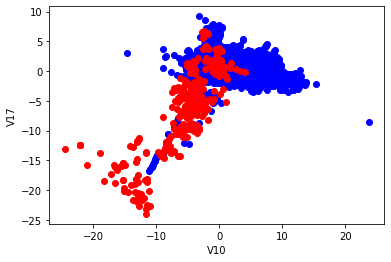

In [ ]:
plot(X_train, y_train, 'V10', 'V17')

There is 1 cluster (of valid transactions), so n_components=1 for Gaussian Mixture

In [ ]:
auc(X_train, y_train, 'V10', 'V17', 1)

AUC of Training set using Features: V10 and V17 = 0.9500051104157331
AUC of Validation set using Features: V10 and V17 = 0.9518143979364522


Set 2: V14 and V17

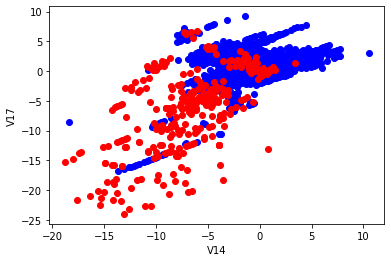

In [ ]:
plot(X_train, y_train, 'V14', 'V17')

There is 1 cluster (of valid transactions), so n_components=1 for Gaussian Mixture

In [ ]:
auc(X_train, y_train, 'V14', 'V17', 1)

AUC of Training set using Features: V14 and V17 = 0.9573976015361967
AUC of Validation set using Features: V14 and V17 = 0.9617390149869304


Set 3: V10 and V14

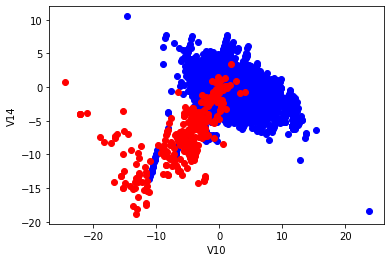

In [ ]:
plot(X_train, y_train, 'V10', 'V14')

There is 1 cluster (of valid transactions), so n_components=1 for Gaussian Mixture

In [ ]:
auc(X_train, y_train, 'V10', 'V14', 1)

AUC of Training set using Features: V10 and V14 = 0.9481965005096469
AUC of Validation set using Features: V10 and V14 = 0.9624168063285814


Set 4: V4 and V11

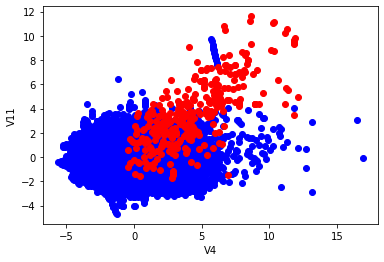

In [ ]:
plot(X_train, y_train, 'V4', 'V11')

There is 1 cluster (of valid transactions), so n_components=1 for Gaussian Mixture

In [ ]:
auc(X_train, y_train, 'V4', 'V11', 1)

AUC of Training set using Features: V4 and V11 = 0.9328166363005013
AUC of Validation set using Features: V4 and V11 = 0.9159473215948355


**Set with best AUC for Validation Set is V10 and V14**

In [ ]:
gmm = GaussianMixture(n_components=1, random_state=0) 

X_train_features = X_train[:][['V10', 'V14']].values
X_val_features = X_val[:][['V10', 'V14']].values

gmm.fit(X_train_features)

train_score = gmm.score_samples(X_train_features)
val_score = gmm.score_samples(X_val_features)


sorted_val_score = sorted(val_score)  #sort points by probability first

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 300):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
    
print("Optimal Threshold =",best_threshold,"with F1 score =",max_f1)


Optimal Threshold = -41.68699900544285 with F1 score = 0.4854368932038835


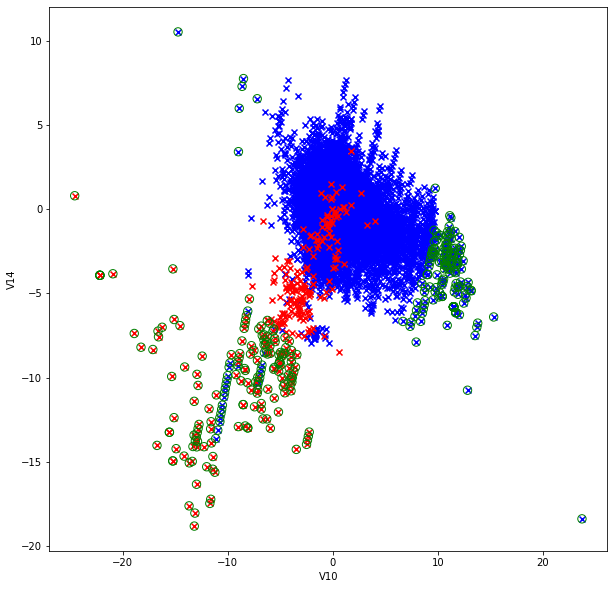

In [ ]:
#Plot for Train Set
plt.figure(figsize=(10,10))

plt.scatter(X_train['V10'][y_train==0], X_train['V14'][y_train==0], c='b', marker='x')  #Non Fraudulent
plt.scatter(X_train['V10'][y_train==1], X_train['V14'][y_train==1], c='r',marker='x')  #Fraudulent
plt.xlabel('V10')
plt.ylabel('V14')

outliers = np.nonzero(train_score<best_threshold)[0]
plt.scatter(X_train['V10'].iloc[outliers],X_train['V14'].iloc[outliers],marker="o",facecolor= "none",edgecolor='g',s=70)
plt.show()

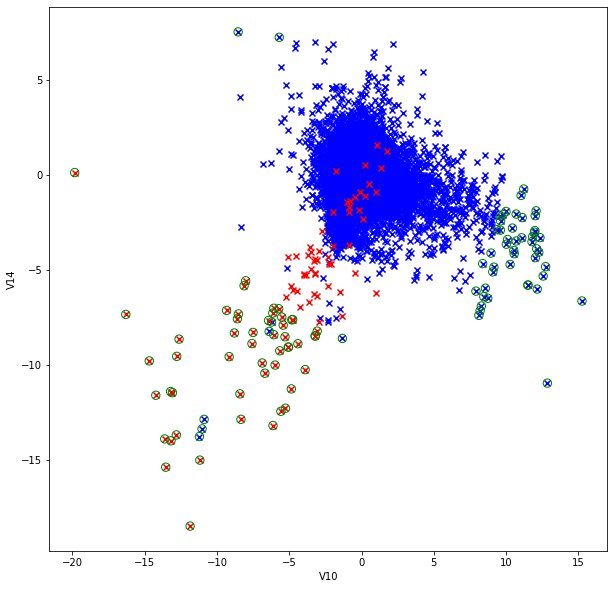

In [ ]:
#Plot for Validation Set
plt.figure(figsize=(10,10))

plt.scatter(X_val['V10'][y_val==0], X_val['V14'][y_val==0], c='b', marker='x')  #Non Fraudulent
plt.scatter(X_val['V10'][y_val==1], X_val['V14'][y_val==1], c='r', marker='x')  #Fraudulent
plt.xlabel('V10')
plt.ylabel('V14')

outliers = np.nonzero(val_score<best_threshold)[0]
plt.scatter(X_val['V10'].iloc[outliers],X_val['V14'].iloc[outliers],marker="o",facecolor= "none",edgecolor='g',s=70)
plt.show()

### Part 3. b.
Features used: V10, V14, V17

In [ ]:
###You can use the following function for 3D plotting in part b  ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='y', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


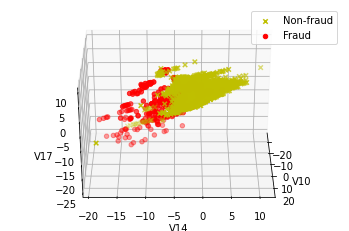

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=0 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

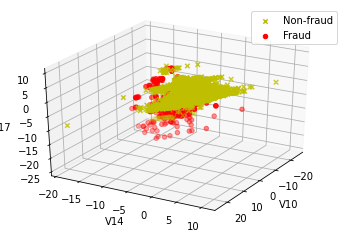

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=30 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

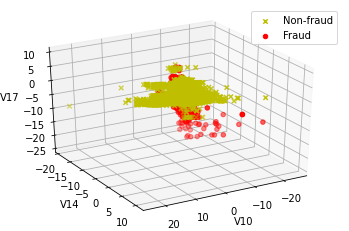

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=60 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

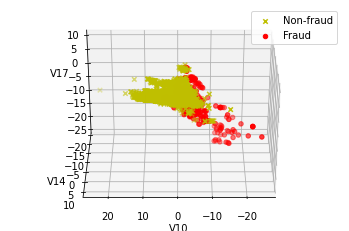

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=90 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

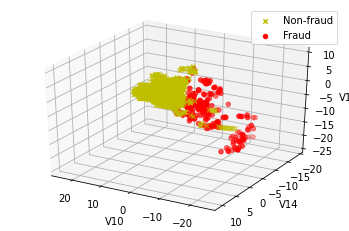

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=120 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

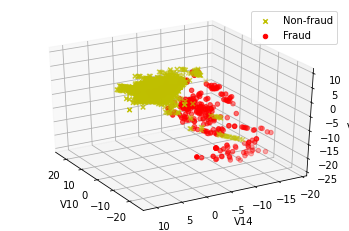

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=150 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

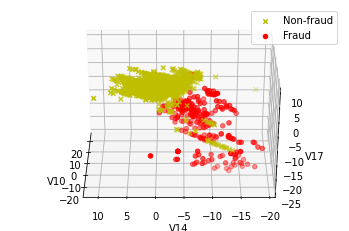

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=180 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

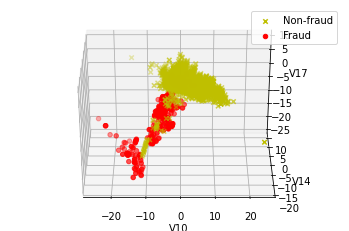

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=270 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

There is one cluster of Valid Samples, hence n_components=1


In [ ]:
### YOUR CODE HERE ###

gmm = GaussianMixture(n_components=1, random_state=0) 

X_train_features = X_train[:][['V10', 'V14', 'V17']].values
X_val_features = X_val[:][['V10', 'V14', 'V17']].values

gmm.fit(X_train_features)

train_score = gmm.score_samples(X_train_features)
val_score = gmm.score_samples(X_val_features)
        
auc_train_score_features = roc_auc_score(y_train, -1 * train_score)
auc_val_score_features = roc_auc_score(y_val, -1 * val_score)

print("AUC of Training set using Features: V10, V14 and V17 = ", auc_train_score_features)
print("AUC of Validation set using Features: V10, V14 and V17 = ", auc_val_score_features)

sorted_val_score = sorted(val_score)  #sort points by probability first

max_f1 = 0
best_threshold = 0
tr=0

for i in range(0, 300):
    tr = sorted_val_score[i]
    f1 = f1_score(y_val, val_score < tr)
    if (f1>max_f1):
        max_f1=f1
        best_threshold=tr
    
print("Optimal Threshold =",best_threshold,"with F1 score =",max_f1)


AUC of Training set using Features: V10, V14 and V17 =  0.9575829948488153
AUC of Validation set using Features: V10, V14 and V17 =  0.9649226169539219
Optimal Threshold = -64.75548534947183 with F1 score = 0.5999999999999999


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). To start, consider $c$ in $[0,10]$ with steps of 0.1. You can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model using the existing AUC function from sklearn? Why? **[0.5]**

In [ ]:
### YOUR CODE HERE ###

table_val = []

for feature in features:

    gmm_1 = GaussianMixture(n_components=1, random_state=0)
    gmm_2 = GaussianMixture(n_components=1, random_state=0)

    X_train_feature_valid = X_train[y_train==0][feature].values.reshape(-1,1) #non-fraudulent
    X_train_feature_fraud = X_train[y_train==1][feature].values.reshape(-1,1) #fraudulent

    X_val_feature = X_val[feature].values.reshape(-1,1)

    gmm_1.fit(X_train_feature_valid)
    gmm_2.fit(X_train_feature_fraud)

    S1 = gmm_1.score_samples(X_val_feature)
    S2 = gmm_2.score_samples(X_val_feature)

    #print(roc_auc_score(y_val[y_val==0], -1 * S1))
    #print(roc_auc_score(y_val[y_val==1], -1 * S2))

    c=0
    C_max=0
    max_f1=0
    precision=0
    recall=0

    while(c<=15):
        f1 = f1_score(y_val, S1 < c*S2)
        if(f1 > max_f1):
            max_f1 = f1
            C_max = c
            precision = precision_score(y_val, S1 < c*S2)
            recall = recall_score(y_val, S1 < c*S2)
        c = c+0.1

    table_val.append([C_max, precision, recall, max_f1])


In [ ]:
table_val = np.array(table_val)
table_val = pd.DataFrame(table_val, columns=["C","Validation Precision","Validation Recall","Validation F1 Score"], index=features)

In [ ]:
print("Table with Validation Data")
table_val

Table with Validation Data


,C,Validation Precision,Validation Recall,Validation F1 Score
V1,6.6,0.148148,0.156863,0.152381
V2,5.9,0.833333,0.098039,0.175439
V3,7.6,0.380282,0.264706,0.312139
V4,4.2,0.363636,0.392157,0.377358
V5,8.3,0.253968,0.156863,0.193939
V6,1.9,0.079470,0.235294,0.118812
V7,14.7,0.425532,0.196078,0.268456
V8,13.7,0.181818,0.078431,0.109589
V9,3.4,0.733333,0.323529,0.448980
V10,6.8,0.515625,0.323529,0.397590


In [ ]:
C_feats = table_val[:]['C']

In [ ]:
#Train Data
table_train = []

for feature in features:

    gmm_1 = GaussianMixture(n_components=1, random_state=0)
    gmm_2 = GaussianMixture(n_components=1, random_state=0)

    X_train_feature_valid = X_train[y_train==0][feature].values.reshape(-1,1) #non-fraudulent
    X_train_feature_fraud = X_train[y_train==1][feature].values.reshape(-1,1) #fraudulent

    X_train_feature = X_train[feature].values.reshape(-1,1)

    gmm_1.fit(X_train_feature_valid)
    gmm_2.fit(X_train_feature_fraud)

    S1 = gmm_1.score_samples(X_train_feature)
    S2 = gmm_2.score_samples(X_train_feature)

    #print(roc_auc_score(y_val[y_val==0], -1 * S1))
    #print(roc_auc_score(y_val[y_val==1], -1 * S2))

    C_max = C_feats[feature]

    f1 = f1_score(y_train, S1 < C_max*S2)
    precision = precision_score(y_train, S1 < C_max*S2)
    recall = recall_score(y_train, S1 < C_max*S2)
    c = c+0.1

    table_train.append([precision, recall, f1])

In [ ]:
table_train = np.array(table_train)
table_train = pd.DataFrame(table_train, columns=["Training Precision","Training Recall","Training F1 Score"], index=features)

In [ ]:
print("Table with Training Data")
table_train

Table with Training Data


,Training Precision,Training Recall,Training F1 Score
V1,0.126506,0.130435,0.128440
V2,0.605263,0.071429,0.127778
V3,0.351759,0.217391,0.268714
V4,0.346041,0.366460,0.355958
V5,0.223404,0.130435,0.164706
V6,0.067164,0.195652,0.100000
V7,0.374194,0.180124,0.243187
V8,0.082192,0.037267,0.051282
V9,0.743802,0.279503,0.406321
V10,0.443089,0.338509,0.383803


5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**

 **Validation Data:**

 Highest F1 Score is 0.670157 for Feature V17 at C=5.9 , Precision = 0.719101 & Recall = 0.627451

 **Train Data:**

 Highest F1 Score is 0.673540 for Feature V12, Precision = 0.753846 & Recall = 0.608696	

 For Feature V17 (best feature found using Validation set), F1 Score = 0.625592, Precision = 0.636656 & Recall = 0.614907

  **Tables as shown above**

6. Can we report AUC for this model using the existing AUC function from sklearn? Why? [0.5]

 **No, we cannot report the AUC for this model using the existing AUC function from sklearn. This is because the roc_auc_score takes the true labels along with the probability estimates or non thresholded decision values. However, our model gives us the predicted values as the final labels and not as probability estimates.**

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

Why does it make sense to have multiple components for the fraudulent transactions?

**This is because there is usually one cluster for valid transactions, however, fraudulent transactions can be spread out in different directions. If we take only one component for fraudulent transactions, it would find one cluster with the maximum fraudulent transactions, but might leave out other fraudulent transactions which are not close to this cluster, thus labelling them as valid.**

In [ ]:
### YOUR CODE HERE ###

def multivariant_gmm(X_train, X_val, y_train, y_val, features, n, table):

    gmm_1 = GaussianMixture(n_components = 1, random_state=0)
    gmm_2 = GaussianMixture(n_components = n, random_state=0) #For fraudulent transactions

    X_train_features_valid = X_train[y_train==0][features].values #non-fraudulent
    X_train_features_fraud = X_train[y_train==1][features].values #fraudulent

    gmm_1.fit(X_train_features_valid)
    gmm_2.fit(X_train_features_fraud)

    X_train_features = X_train[:][features].values
    X_val_features = X_val[:][features].values

    S1_train = gmm_1.score_samples(X_train_features)
    S2_train = gmm_2.score_samples(X_train_features)

    S1_val = gmm_1.score_samples(X_val_features)
    S2_val = gmm_2.score_samples(X_val_features)

    max_f1_train = 0
    precision_train = 0
    recall_train = 0

    max_f1_val = 0
    C = 0
    precision_val = 0
    recall_val = 0

    
    c=0
    while(c<=15):
        f1 = f1_score(y_val, S1_val < c*S2_val)
        if(f1 > max_f1_val):
            max_f1_val = f1
            C = c
            precision_val = precision_score(y_val, S1_val < c*S2_val)
            recall_val = recall_score(y_val, S1_val < c*S2_val)
        c = c+0.1

    f1_train = f1_score(y_train, S1_train < C*S2_train)
    precision_train = precision_score(y_train, S1_train < C*S2_train)
    recall_train = recall_score(y_train, S1_train < C*S2_train)

    table.append([len(features), n, C, precision_train, recall_train, f1_train, precision_val, recall_val, max_f1_val])

In [ ]:
#These features are the top 7 features by AUC on validation set, as seen in Part 2a, arranged in descending order
max_features = ['V14', 'V17', 'V10', 'V16', 'V12', 'V7', 'V4']

In [ ]:
table = []

#Here, we take collection of features, from only V14, followed by [V14,V17], [V14, V17, V10], and upto all features in max_features
#Next, we increment the number of components used for GMM trained on Fraudulent data ranging from 1 to 5 clusters. For GMM trained on valid/non-fraudulent data, n is fixed to 1

for num_feats in range(1,8):

    for n in range(1,6,1):

        print("Iteration: num_feats =",num_feats,", n =",n) #To print which iteration is the loop currently on
        multivariant_gmm(X_train, X_val, y_train, y_val, max_features[:num_feats], n, table)


Iteration: num_feats = 1 , n = 1
Iteration: num_feats = 1 , n = 2
Iteration: num_feats = 1 , n = 3
Iteration: num_feats = 1 , n = 4
Iteration: num_feats = 1 , n = 5
Iteration: num_feats = 2 , n = 1
Iteration: num_feats = 2 , n = 2
Iteration: num_feats = 2 , n = 3
Iteration: num_feats = 2 , n = 4
Iteration: num_feats = 2 , n = 5
Iteration: num_feats = 3 , n = 1
Iteration: num_feats = 3 , n = 2
Iteration: num_feats = 3 , n = 3
Iteration: num_feats = 3 , n = 4
Iteration: num_feats = 3 , n = 5
Iteration: num_feats = 4 , n = 1
Iteration: num_feats = 4 , n = 2
Iteration: num_feats = 4 , n = 3
Iteration: num_feats = 4 , n = 4
Iteration: num_feats = 4 , n = 5
Iteration: num_feats = 5 , n = 1
Iteration: num_feats = 5 , n = 2
Iteration: num_feats = 5 , n = 3
Iteration: num_feats = 5 , n = 4
Iteration: num_feats = 5 , n = 5
Iteration: num_feats = 6 , n = 1
Iteration: num_feats = 6 , n = 2
Iteration: num_feats = 6 , n = 3
Iteration: num_feats = 6 , n = 4
Iteration: num_feats = 6 , n = 5
Iteration:

In [ ]:
table = pd.DataFrame(table, columns=["No. of Features","No. of Components","C","Training Precision","Training Recall","Training F1 Score", "Validation Precision","Validation Recall","Validation F1 Score"])

In [ ]:
table

,No. of Features,No. of Components,C,Training Precision,Training Recall,Training F1 Score,Validation Precision,Validation Recall,Validation F1 Score
0,1,1,7.0,0.595376,0.639752,0.616766,0.653846,0.666667,0.660194
1,1,2,7.3,0.599415,0.636646,0.617470,0.653846,0.666667,0.660194
2,1,3,7.1,0.597101,0.639752,0.617691,0.653846,0.666667,0.660194
3,1,4,7.9,0.595376,0.639752,0.616766,0.653846,0.666667,0.660194
4,1,5,7.5,0.595376,0.639752,0.616766,0.653846,0.666667,0.660194
5,2,1,7.6,0.796364,0.680124,0.733668,0.862500,0.676471,0.758242
6,2,2,7.5,0.813187,0.689441,0.746218,0.886076,0.686275,0.773481
7,2,3,6.3,0.748408,0.729814,0.738994,0.824176,0.735294,0.777202
8,2,4,6.8,0.750809,0.720497,0.735341,0.840909,0.725490,0.778947
9,2,5,6.4,0.750799,0.729814,0.740157,0.804348,0.725490,0.762887


**Best Model (Highest F1 Score on Validation Set)**

 Number of Features: 7

 Features: 'V14', 'V17', 'V10', 'V16', 'V12', 'V7', 'V4'

 Number of Gaussians: 2

 Number of Components/Clusters for Gaussian trained on Valid transactions: 1

 Number of Components/Clusters for Gaussian trained on Fraudulent transactions: 3	
 
 Threshold (C): 6.3
 
 Training Precision: 0.821192	
 
 Training Recall: 0.770186	
 
 Training F1 Score: 0.794872	
 
 Validation Precision: 0.887640

 Validation Recall: 0.774510

 Validation F1 Score: 0.827225

## **Part 6: Evaluating performance on test set: [2 Marks]**
**Which model worked best?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[2]**


**Which model worked best?**

 Number of Features: 7

 Features: 'V14', 'V17', 'V10', 'V16', 'V12', 'V7', 'V4'

 Number of Gaussians: 2

 Number of Components/Clusters for Gaussian trained on Valid transactions: 1

 Number of Components/Clusters for Gaussian trained on Fraudulent transactions: 3

 Threshold (C): 6.3

In [ ]:
### YOUR CODE HERE ###

n = 3
features_used = ['V14', 'V17', 'V10', 'V16', 'V12', 'V7', 'V4']
c = 6.3

gmm_1 = GaussianMixture(n_components = 1, random_state=0)
gmm_2 = GaussianMixture(n_components = n, random_state=0) #For fraudulent transactions

X_train_features_valid = X_train[y_train==0][features_used].values #non-fraudulent
X_train_features_fraud = X_train[y_train==1][features_used].values #fraudulent

gmm_1.fit(X_train_features_valid)
gmm_2.fit(X_train_features_fraud)

X_test_features = X_test[:][features_used].values

S1_test = gmm_1.score_samples(X_test_features)
S2_test = gmm_2.score_samples(X_test_features)

f1_test = f1_score(y_test, S1_test < c*S2_test)
precision_test = precision_score(y_test, S1_test < c*S2_test)
recall_test = recall_score(y_test, S1_test < c*S2_test)

print("Precision on Test Set = ", precision_test)
print("Recall on Test Set = ", recall_test)
print("F1 Score on Test Set = ", f1_test)

Precision on Test Set =  0.8260869565217391
Recall on Test Set =  0.8382352941176471
F1 Score on Test Set =  0.832116788321168


In [ ]:
!jupyter nbconvert --to html /content/S22_APS1070_Project_2.ipynb

[NbConvertApp] Converting notebook /content/S22_APS1070_Project_2.ipynb to html
[NbConvertApp] Writing 1747024 bytes to /content/S22_APS1070_Project_2.html
